# Fix pathing

In [1]:
import sys


sys.path.append("..")


In [2]:
import constants

import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))


# Imports

In [3]:
import datahandler
import plotter
import utils

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Constants

In [4]:
data_preprocessor = datahandler.DataPreprocessorOUS_V2()
data_preprocessor.execute()

data_loader = datahandler.DataLoader(datahandler.DataPreprocessorOUS_V2)


Enhancing dataset: 100%|██████████| 2/2 [00:00<?, ?it/s]


# Main

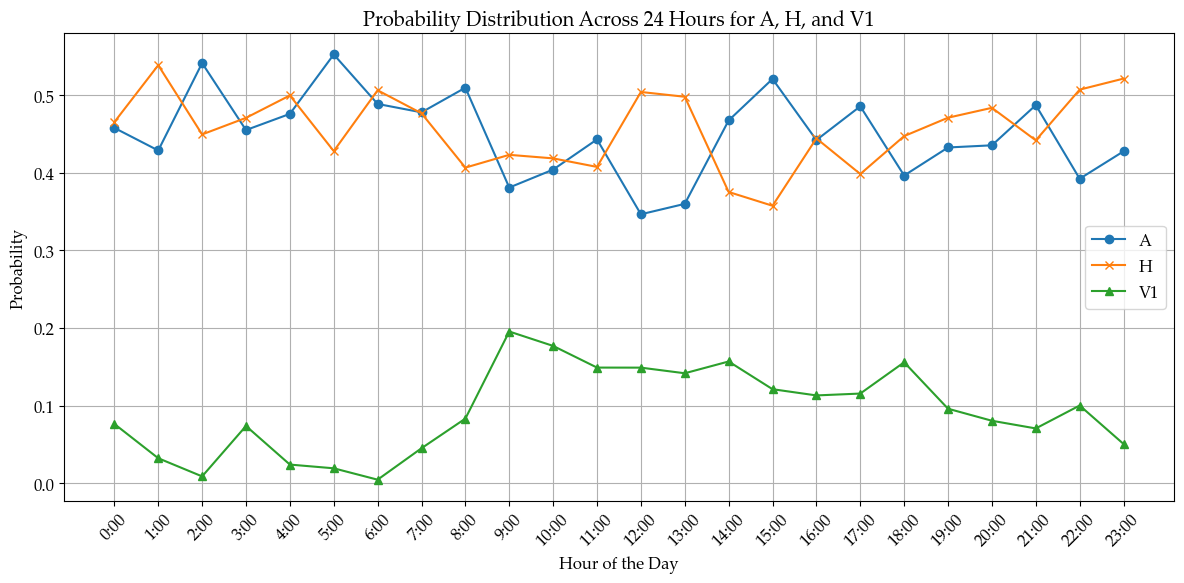

In [5]:
# Raw probabilities for each hour for A, H, and V1
probabilities = [
    (0.45801, 0.465509, 0.0764814), (0.428908, 0.538814, 0.0322795), (0.541539, 0.449588, 0.00887308),
    (0.455225, 0.470947, 0.073828), (0.476072, 0.499828, 0.0240996), (0.552618, 0.428086, 0.0192963),
    (0.488875, 0.506495, 0.00462997), (0.478057, 0.476798, 0.0451465), (0.509834, 0.406805, 0.0833616),
    (0.381115, 0.423292, 0.195594), (0.404257, 0.418724, 0.177017), (0.443176, 0.407725, 0.149099),
    (0.346676, 0.504296, 0.149029), (0.360097, 0.498123, 0.14178), (0.467625, 0.375405, 0.156969),
    (0.521087, 0.357667, 0.121245), (0.44232, 0.444462, 0.113217), (0.485821, 0.398559, 0.115619),
    (0.396623, 0.44744, 0.155938), (0.432771, 0.471142, 0.0960879), (0.435562, 0.483872, 0.0805665),
    (0.487359, 0.441968, 0.0706736), (0.392469, 0.507302, 0.100229), (0.427796, 0.521541, 0.0506629)
]

# Separating the probabilities for A, H, and V1
probabilities_A = [p[0] for p in probabilities]
probabilities_H = [p[1] for p in probabilities]
probabilities_V1 = [p[2] for p in probabilities]

hours = list(range(24))  # 24 hours

# Plotting the probabilities for A, H, and V1 over the 24-hour period
plt.figure(figsize=(12, 6))
plt.plot(hours, probabilities_A, label='A', marker='o')
plt.plot(hours, probabilities_H, label='H', marker='x')
plt.plot(hours, probabilities_V1, label='V1', marker='^')
plt.xticks(hours, [f"{hour}:00" for hour in hours], rotation=45)  # Format x-axis labels as "hour:00"
plt.xlabel('Hour of the Day')
plt.ylabel('Probability')
plt.title('Probability Distribution Across 24 Hours for A, H, and V1')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


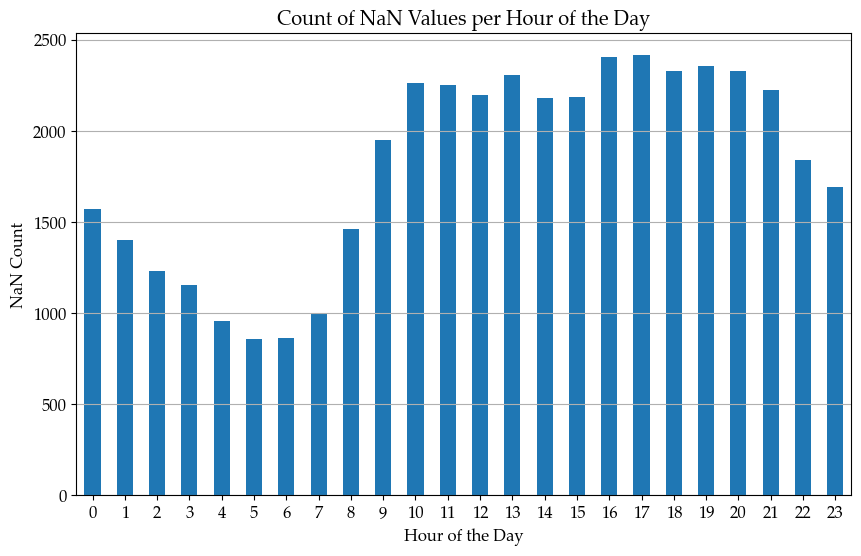

In [6]:

df = data_loader.data_preprocessor.load_enhanced_incidents_dataframe()

# Extract the hour from the datetime column
df["hour"] = df["time_call_received"].dt.hour

# Count NaNs per hour
nan_counts_per_hour = df[df["time_ambulance_dispatch_to_hospital"].isna()].groupby("hour")["time_ambulance_dispatch_to_hospital"].size()

# Step 3: Plotting
plt.figure(figsize=(10, 6))
nan_counts_per_hour.plot(kind="bar")
plt.title("Count of NaN Values per Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("NaN Count")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


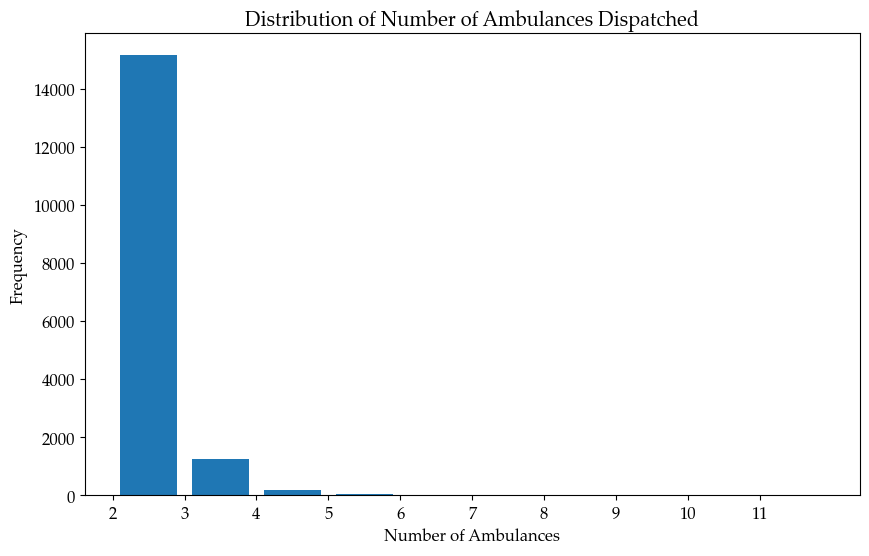

In [15]:
df = data_loader.data_preprocessor.load_enhanced_incidents_dataframe()

plt.figure(figsize=(10, 6))
plt.hist(df["resources_sent"], bins=np.arange(2, df["resources_sent"].max() + 1.5, 1), rwidth=0.8)
plt.xlabel("Number of Ambulances")
plt.ylabel("Frequency")
plt.title("Distribution of Number of Ambulances Dispatched")
plt.xticks(np.arange(2, df["resources_sent"].max() + 1))
plt.show()


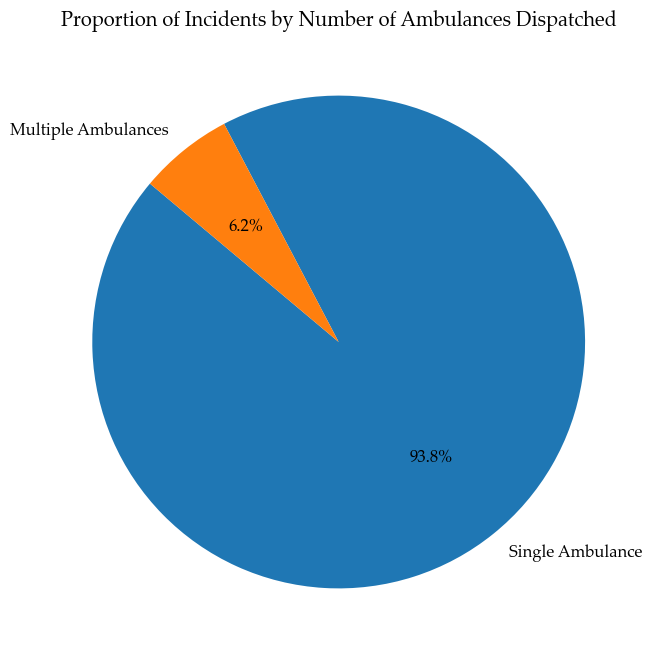

In [8]:
counts = df["resources_sent"].value_counts().sort_index()
single = counts[1] if 1 in counts else 0
multiple = counts[counts.index > 1].sum()

plt.figure(figsize=(8, 8))
plt.pie([single, multiple], labels=["Single Ambulance", "Multiple Ambulances"], autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Incidents by Number of Ambulances Dispatched")
plt.show()

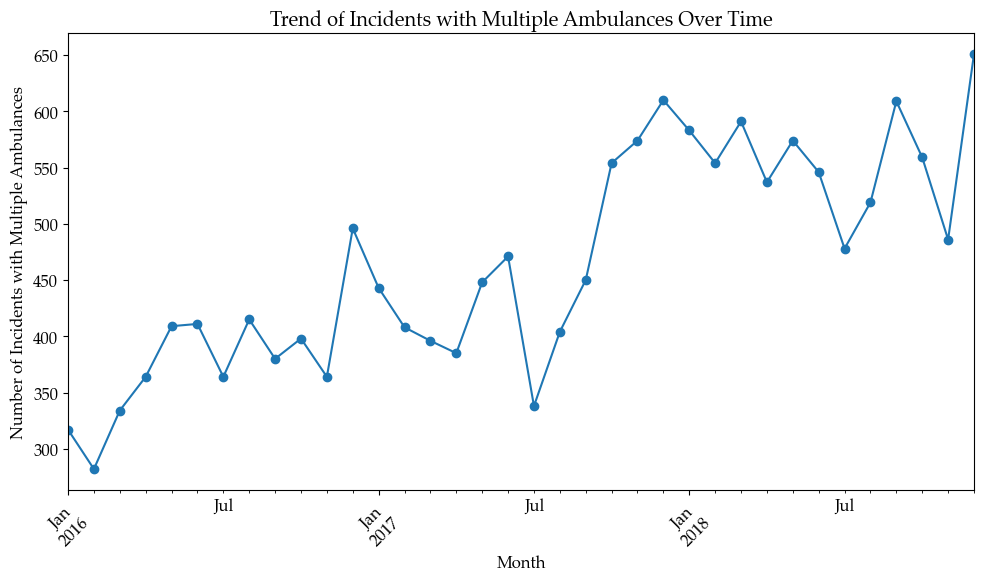

In [9]:
# Count the number of incidents with multiple ambulances by month
df["Month"] = df["time_call_received"].dt.to_period("M")
multiple_ambulances_monthly = df[df["resources_sent"] > 1].groupby("Month").size()

plt.figure(figsize=(10, 6))
multiple_ambulances_monthly.plot(kind="line", marker='o')
plt.xlabel("Month")
plt.ylabel("Number of Incidents with Multiple Ambulances")
plt.title("Trend of Incidents with Multiple Ambulances Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


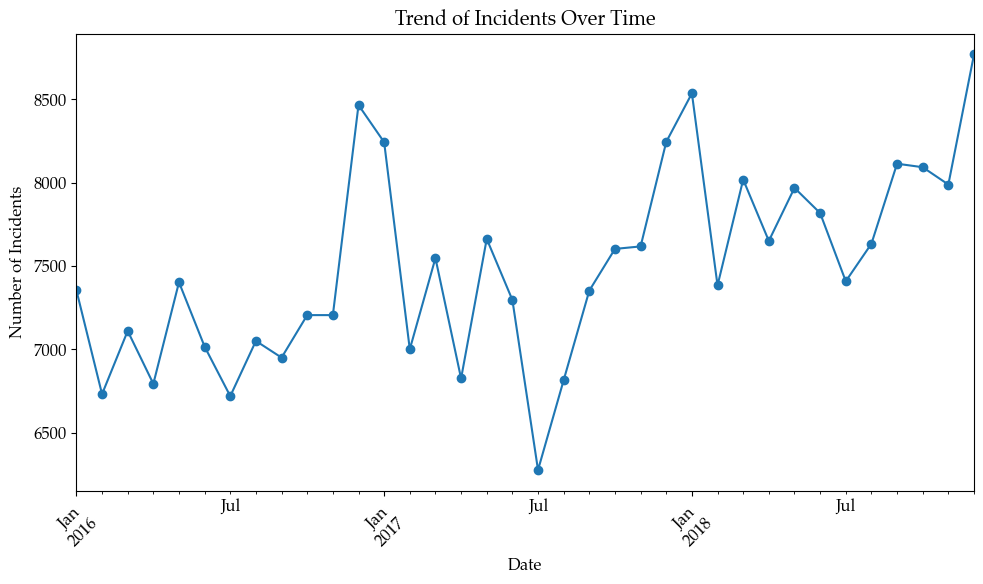

In [10]:
monthly_incidents = df.groupby("Month").size()

plt.figure(figsize=(10, 6))
monthly_incidents.plot(kind="line", marker='o')
plt.xlabel("Date")
plt.ylabel("Number of Incidents")
plt.title("Trend of Incidents Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


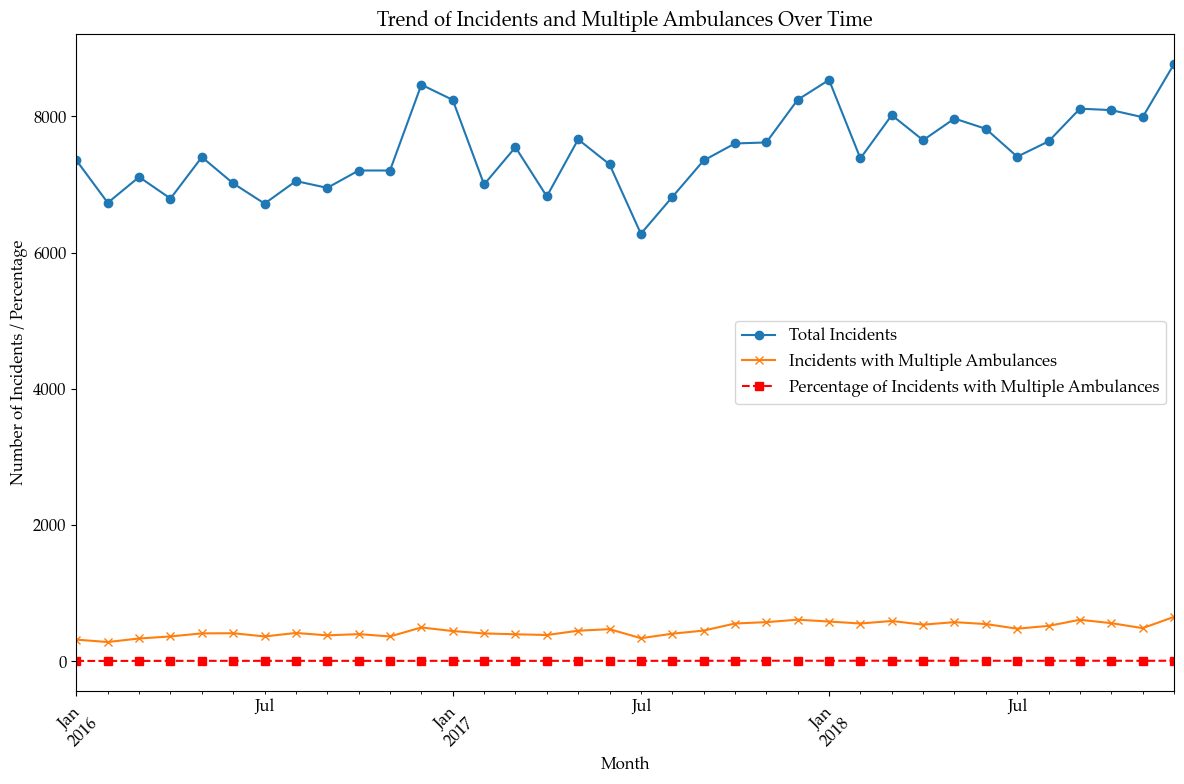

In [11]:
# Calculate the total number of incidents per month
monthly_incidents = df.groupby("Month").size()

# Calculate the number of incidents with multiple ambulances per month
multiple_ambulances_monthly = df[df["resources_sent"] > 1].groupby("Month").size()

# Calculate the percentage of incidents with multiple ambulances
percentage_multiple_ambulances = (multiple_ambulances_monthly / monthly_incidents) * 100

# Plotting
plt.figure(figsize=(12, 8))

# Plot total incidents per month
monthly_incidents.plot(kind="line", marker='o', label='Total Incidents')

# Plot incidents with multiple ambulances per month
multiple_ambulances_monthly.plot(kind="line", marker='x', label='Incidents with Multiple Ambulances')

# Plot percentage of incidents with multiple ambulances
percentage_multiple_ambulances.plot(kind="line", linestyle='--', marker='s', color='red', label='Percentage of Incidents with Multiple Ambulances')

plt.xlabel("Month")
plt.ylabel("Number of Incidents / Percentage")
plt.title("Trend of Incidents and Multiple Ambulances Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
df = data_loader.data_preprocessor.load_enhanced_incidents_dataframe()


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269887 entries, 0 to 269886
Data columns (total 22 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   triage_impression_during_call        269887 non-null  object        
 1   resource_id                          269887 non-null  object        
 2   resource_type                        269887 non-null  object        
 3   resources_sent                       269887 non-null  int64         
 4   time_call_received                   269887 non-null  datetime64[ns]
 5   time_incident_created                269887 non-null  datetime64[ns]
 6   time_resource_appointed              269887 non-null  datetime64[ns]
 7   time_ambulance_dispatch_to_scene     269887 non-null  datetime64[ns]
 8   time_ambulance_arrived_at_scene      269887 non-null  datetime64[ns]
 9   time_ambulance_dispatch_to_hospital  226455 non-null  datetime64[ns]
 

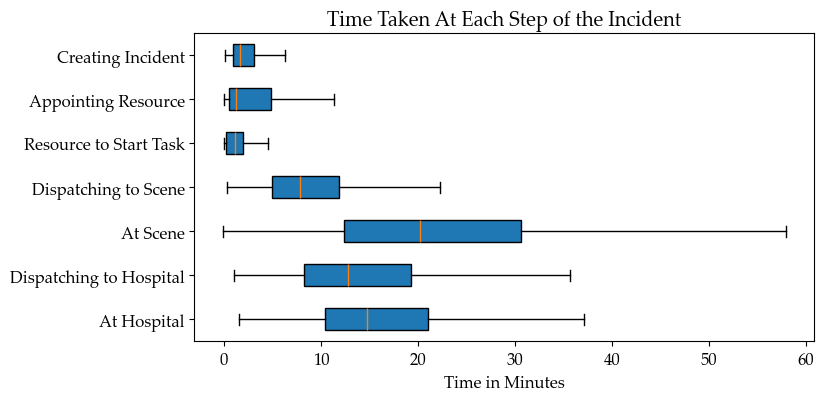

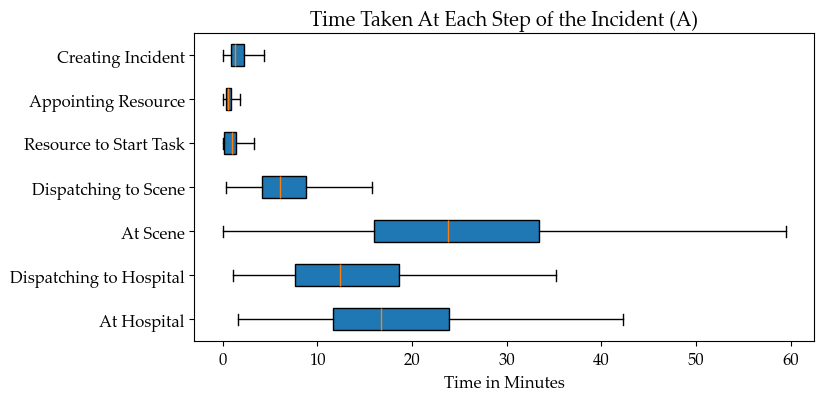

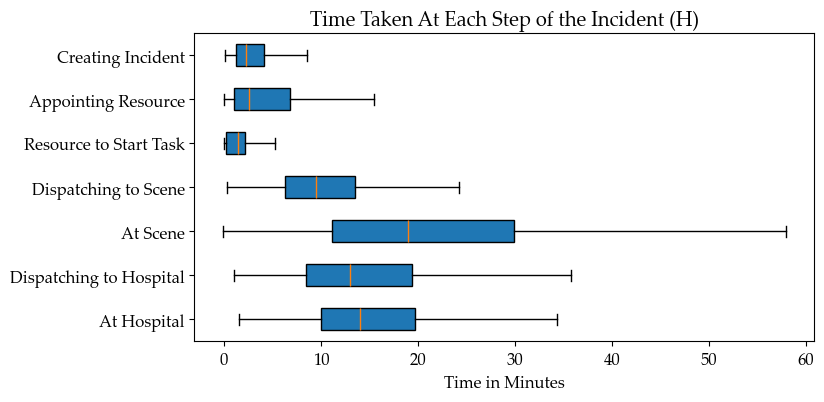

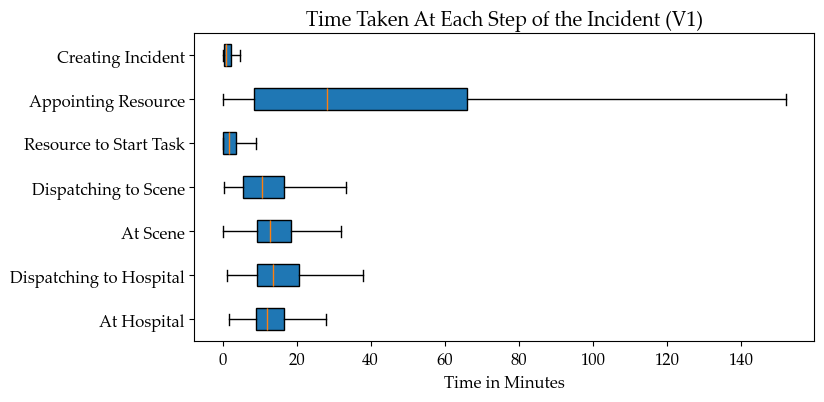

In [14]:
plotter.boxplot_time_at_steps(df)
plotter.boxplot_time_at_steps(df, triage_impression="A")
plotter.boxplot_time_at_steps(df, triage_impression="H")
plotter.boxplot_time_at_steps(df, triage_impression="V1")
